In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

/home/stefan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
X, y = load_iris(return_X_y=True)

In [6]:
X_df = pd.DataFrame(X)

In [54]:
X_df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [56]:
# X_df = X_df.iloc[:, :2]

In [57]:
X = X[:, :2]
X.shape

(150, 2)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=313, stratify=y)

In [60]:
X_train.shape

(120, 2)

In [61]:
X_test.shape

(30, 2)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
scaler.mean_

array([5.8375    , 3.06916667])

In [67]:
scaler.var_

array([0.67284375, 0.19929931])

In [68]:
scaler.scale_ * scaler.scale_

array([0.67284375, 0.19929931])

In [69]:
X_train = scaler.transform(X_train)

In [70]:
# 1 zabranjeno
# scaler_test = StandardScaler()
# scaler_test.fit(X_test)
# # scaler_test.transform(X_test)
# scaler_test.mean_

In [71]:
scaler.mean_

array([5.8375    , 3.06916667])

In [72]:
# 2
X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
param_grid = {'n_neighbors': range(3, 8),
              'weights': ['uniform', 'distance']}

In [49]:
gs = GridSearchCV(KNeighborsClassifier(),
             param_grid=param_grid,
             scoring='accuracy',
             cv=4,
             verbose=5)

In [50]:
gs.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.967, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.967, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.967, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.967, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.967, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_nei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(3, 8),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=5)

In [48]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
gs.best_score_

0.9750000000000001

In [52]:
y_pred = gs.best_estimator_.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  7,  3],
       [ 0,  1,  9]])

In [172]:
X_train.shape

(120, 2)

In [198]:
model = KNeighborsClassifier(n_neighbors=X_train.shape[0])

In [199]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=120, p=2,
                     weights='uniform')

In [200]:
y_train_pred = model.predict(X_train)

In [201]:
from sklearn.metrics import confusion_matrix

In [202]:
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [40,  0,  0],
       [40,  0,  0]])

In [203]:
y_test_pred = model.predict(X_test)

In [204]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [10,  0,  0],
       [10,  0,  0]])

In [205]:
X_train[:,0].min()

-1.8743816034708238

In [206]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

In [207]:
x_min, x_max

(-1.8743816034708238, 2.2705923489199353)

In [208]:
y_min, y_max

(-2.3949283093112164, 2.9810604130709373)

In [209]:
step=0.03
x_range = np.arange(x_min, x_max, step)
y_range = np.arange(y_min, y_max, step)

In [210]:
x_range.shape

(139,)

In [211]:
y_range.shape

(180,)

In [212]:
xx, yy = np.meshgrid(x_range, y_range)

In [213]:
xx.shape

(180, 139)

In [214]:
yy.shape

(180, 139)

In [215]:
from matplotlib import pyplot as plt

In [216]:
x_column = xx.ravel()

In [217]:
y_column = yy.ravel()

In [218]:
X_synthetic = np.c_[x_column, y_column]
X_synthetic.shape

(25020, 2)

In [219]:
y_syn_pred = model.predict(X_synthetic)
y_syn_pred.shape

(25020,)

In [220]:
xx.shape

(180, 139)

In [221]:
y_syn_pred.reshape(xx.shape).shape

(180, 139)

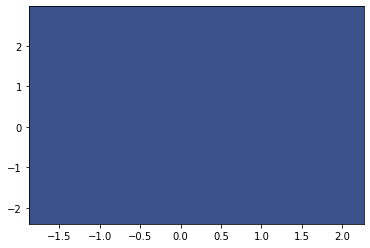

In [222]:
plt.contourf(xx, yy, y_syn_pred.reshape(xx.shape))